In [1]:
import sys
import os    


In [2]:
# Add the root directory to the Python path
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root_dir not in sys.path:
    sys.path.append(root_dir)

In [3]:
# Import utility functions
from Utils.tools import (
    generate_lorenz_data,
    plot_lorenz_attractor,
    animate_lorenz_attractor
)

In [57]:
# Generate Lorenz data
seq_len=20000
data = generate_lorenz_data(seq_len, initial_point=[2, 1, 1])

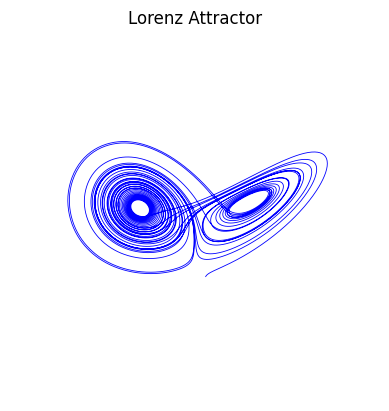

In [59]:
fig = plot_lorenz_attractor(data, l_train=-1, draw_axis=False, draw_grid=False)

In [61]:
fig.savefig('lorenz_attractor.png', bbox_inches='tight', dpi=300)

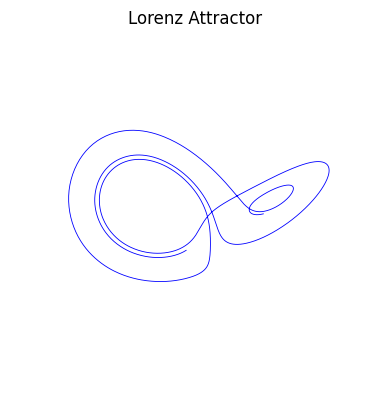

In [187]:
data_range = data[11000:13000]
fig = plot_lorenz_attractor(data_range, l_train=-1, draw_axis=False, draw_grid=False)

In [181]:
import numpy as np
import plotly.graph_objects as go
from scipy.integrate import odeint
#from plotly.io import to_image
import plotly.io as pio
pio.templates.default = "plotly"

# Parameters
prm = {
    'sigma': 10,
    'rho': 28,
    'beta': 8 / 3
}

# Initial values
varini = [2, 1, 1]  # X, Y, Z

# Lorenz system equations
def Lorenz(vars, t, prm):
    X, Y, Z = vars
    dX = prm['sigma'] * (Y - X)
    dY = X * (prm['rho'] - Z) - Y
    dZ = X * Y - prm['beta'] * Z
    return [dX, dY, dZ]

# Time points
times = np.arange(0, 100, 0.01)

# Solve the ODE
out = odeint(Lorenz, varini, times, args=(prm,))

# Convert to a DataFrame for easier manipulation
dout = {
    'X': out[:, 0],
    'Y': out[:, 1],
    'Z': out[:, 2]
}

# Function to repeat an array to a certain length
def gfill(repArr, long):
    return np.tile(repArr, int(np.ceil(long / len(repArr))))[:long]

# Assign colors to points
colors = gfill(np.linspace(0, 1, 10), len(dout['X']))  # Use a rainbow-like gradient

# Create the Plotly 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=dout['X'], y=dout['Y'], z=dout['Z'],
    mode='lines',
    line=dict(
        width=1,
        color=colors,  # Use the gradient colors
        colorscale='Rainbow',  # Rainbow colorscale
        showscale=False  # Show the colorbar
    )
)])

# Option to hide the axes
hide_axes = True  # Set this to True to hide the axes, False to show them

# Set initial size of the plot
initial_width = 1200  # Width in pixels
initial_height = 900  # Height in pixels

# Update layout for better visualization
fig.update_layout(
    scene=dict(
        xaxis=dict(
            showticklabels=not hide_axes,
            showgrid=not hide_axes,
            zeroline=not hide_axes
        ),
        yaxis=dict(
            showticklabels=not hide_axes,
            showgrid=not hide_axes,
            zeroline=not hide_axes
        ),
        zaxis=dict(
            showticklabels=not hide_axes,
            showgrid=not hide_axes,
            zeroline=not hide_axes
        )
    ),
    title="Lorenz Attractor with Gradual Color Change",
    width=initial_width,  # Set initial width
    height=initial_height,  # Set initial height
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)'  # Transparent background for the paper
)

# Show the plot
fig.show()
